# Stock returns during easter

## Introduction
### Emperical strategy
We attempt to estimate the causal effects of easter on stockmarket returns using af Difference in Difference (DiD) identification strategy. We estimate the equation:

$$
\text{Daily\_return}_{it}=\beta_{0}+\beta_{1}\times\text{Chrisitan}_{it}+\beta_{2}\text{Easter}_{it}+\beta_{3}\text{Easter}_{it}\times\text{Christian}_{it}
$$

Under some assumptions we can we can derive $\beta_{3}$ to have a causal interpretation, where $\beta_{3}$ is given by: 
$$
\beta_{3}=E[\text{Daily\_return}_{it}\vert\text{Easter=1},\text{Christ}=1]-E[\text{Daily\_return}_{it}\vert\text{Easter=0},\text{Christ}=1]
$$

The equation can be derived using the observed differences from period $t-1$ to period $t$ in a Christian and non Christian country. 
The oberved changes in the daily returns of a christian country in the given by $\Delta\text{Daily\_return}_{christ}=E[\text{Daily\_return}\vert\text{Easter=1},\text{Christ}=1]-E[\text{Daily\_return}_{it-1}\vert\text{Easter=0},\text{Christ}=1]$

We can add and subtract the counterfactual scenario of $E[\text{Daily\_return}_{it}\vert\text{Easter=0},\text{Christ}=1]$

$$\Delta\text{Daily\_return}_{Christ}=E[\text{Daily\_return}_{it}\vert\text{Easter=1},\text{Christ}=1]-E[\text{Daily\_return}_{it}\vert\text{Easter=0},\text{Christ}=1]$$
 
$$+E[\text{Daily\_return}_{it}\vert\text{Easter=0},\text{Christ}=1]-E[\text{Daily\_return}_{it-1}\vert\text{Easter=0},\text{Christ}=1]$$
 
If we then subtract the observed changes from period t-1 to t for a predominantly non Christian country 

$$ \Delta\text{Daily\_return}_{Christ}-\Delta\text{Daily\_return}_{nonChrist}=E[\text{Daily\_return}_{it}\vert\text{Easter=1},\text{Christ}=1]-E[\text{Daily\_return}_{it}\vert\text{Easter=0},\text{Christ}=1] $$
$$ +E[\text{Daily\_return}_{it}\vert\text{Easter=0},\text{Christ}=1]-E[\text{Daily\_return}_{it-1}\vert\text{Easter=0},\text{Christ}=1] $$

$$ -E[\text{Daily\_return}_{it}\vert\text{Easter=0},\text{Christ}=0]-E[\text{Daily\_return}_{it-1}\vert\text{Easter=0},\text{Christ}=0] $$

Under the assumption that 
$$
E[\text{Daily\_return}_{it}\vert\text{Easter=0},\text{Christ}=1]-E[\text{Daily\_return}_{it-1}\vert\text{Easter=1},\text{Christ}=1]=$$
$$E[\text{Daily\_return}_{it}\vert\text{Easter=0},\text{Christ}=0]-E[\text{Daily\_return}_{it-1}\vert\text{Easter=0},\text{Christ}=0]
$$

which is commonly known as the parralel trend assumption, we have identfied $\beta_{3}$ and can interpret the results from the regression as the causal effect of Easter on stock returns.

Imports and set magics:

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
# from matplotlib_venn import venn2
import os
import datetime

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject

# customized directoryy
input_dir = os.path.join(os.getcwd(),'data')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Easter dates

We use data on the placement of easter from the (in)famous website ugenr.dk. We obtain the data for easter dates by "scraping" ugenr.dk for the easter dates. 

### Read and clean data

The purpose is to generate a dataset with all the easter week dates from 2000 to 2023 <br>
To do so, we scrape data from ugenr.dk <br>
[This](https://ugenr.dk/2023/påske) is an example of how the webpage would look for 2023.

In [71]:
# a. import raw data from scrape.
ugenr_scrape = pd.read_pickle(os.path.join(input_dir,'paaskedage.pkl')) 

# b. sort after year
ugenr_scrape.sort_values(by='year',inplace=True, ignore_index=True)

ugenr_scrape

,year,month,start_date,end_date,uge,dato
0,2000,april,17,23,uge 16,mandag 17. – søndag 23. april 2000
1,2001,april,9,15,uge 15,mandag 9. – søndag 15. april 2001
2,2002,marts,25,31,uge 13,mandag 25. – søndag 31. marts 2002
3,2003,april,14,20,uge 16,mandag 14. – søndag 20. april 2003
4,2004,april,5,11,uge 15,mandag 5. – søndag 11. april 2004
5,2005,marts,21,27,uge 12,mandag 21. – søndag 27. marts 2005
6,2006,april,10,16,uge 15,mandag 10. – søndag 16. april 2006
7,2007,april,2,8,uge 14,mandag 2. – søndag 8. april 2007
8,2008,marts,17,23,uge 12,mandag 17. – søndag 23. marts 2008
9,2009,april,6,12,uge 15,mandag 6. – søndag 12. april 2009


From the **dato**-variable, we can extract the month and when easter started and ended for each year. <br>
We want to convert this information to (daily) dates, i.e. 2022-04-11, 2022-04-12, ... <br>

We would expect the number of observations to be the number of years times number of days in easter week: <br>
$ 23 \cdot 7 = 161 $

Furthermore, we create a dummy equal to 1 for each date, which is crucial, when we later join the easter dates on stock data for OMXS30 and NIFTY 50 

In [72]:
# a. convert months to digits
month_dict = {'april' : '4', 'marts' : '5'}
ugenr_scrape.replace({"month": month_dict}, inplace = True)

# b. generate (daily) dates by iterating over rows
dates = []
for year, month, start in ugenr_scrape[['year', 'month', 'start_date']].itertuples(index=False):
    # 1. define first date of easter for given year
    first_date = datetime.date(int(year), int(month), int(start))

    # 2. generate list of all days in easter week
    date_int = [first_date + datetime.timedelta(days=i) for i in range(7)] # eg. [2022-04-11, 2022-04-12, ... ]

    # 3. append result to dates
    for date in date_int:
        dates.append(date)

# c. create dataframe and store results
df = pd.DataFrame(data = dates, columns = ['date'])
df['easter_week'] = 1 # our dummy for merging later
#  df.to_pickle('./data/dates.pkl')

df


,date,easter_week
0,2000-04-17,1
1,2000-04-18,1
2,2000-04-19,1
3,2000-04-20,1
4,2000-04-21,1
...,...,...
156,2022-04-13,1
157,2022-04-14,1
158,2022-04-15,1
159,2022-04-16,1


### Quick analysis of easter data

A concern could be that date-specific events, that are unrelated to easter, influences the stock prices. <br>
For instance quarterly rapports that are published on a specific date in easter week. <br>
This could influence the stock return and thereby gives us a biased $ \beta_3 $ estimator. <br>
However, if we can show that the dates in easter week are randomly choosen, we can leave this bias out

Figure 1 below shows that the dates we have defnied as 'Easter Dates' are quite evenly spread across dates in the month 

<AxesSubplot:title={'center':'Fig 1: Histogram of dates in easter week (2000-2023)'}, xlabel='date'>

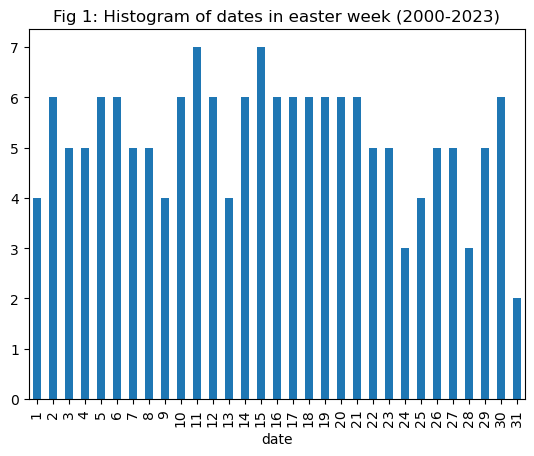

In [73]:
# histogram of dates
df['date'] = pd.to_datetime(df['date'])

df.date.groupby(df["date"].dt.day).count().plot(kind="bar",title = "Fig 1: Histogram of dates in easter week (2000-2023)")


As shown in Fig 1, the date appears to be somewhat random, in we can therefore argue for no date-specific bias

# Cleaing and merge of stock data

We use data on the Swedish and Indian indices, OMXS30 and NIFTY50 respectively. We obtain the data as an csv file from from Yahoo Finance.


Firstly, we perform an inner join on the two indices. By doing an inner join, we keep all dates, where both stock exchanges are open and discard dates, where either one of the two exchanges is closed. This leads to fewer observations, but enables us to compare the two indices. Secondly, we do some light cleaning, including renaming and dropping columns that we do not need.  

### Read, merge and clean data

In [74]:

# The function read_yahoo reads the downloaded CSV-files and renames the columns
omx = dataproject.read_yahoo(input_dir, 'omxs30.csv')
nifty = dataproject.read_yahoo(input_dir, 'nsei2.csv')

# drop the columns we do not need
for i in [omx, nifty]:
    i.drop(columns=['open', 'high', 'low','close', 'volume'], axis=1, inplace=True)

# inner-join the two datasets
merge_inner = pd.merge(omx, nifty, on='date',how='inner')

# specify the column names again after the the merge 
rename_dict = {}
for i in merge_inner.columns:
        rename_dict[i] = i.lower()
        rename_dict[i] = rename_dict[i].replace('_x','_omxs')
        rename_dict[i] = rename_dict[i].replace('_y','_nifty')

merge_inner = merge_inner.rename(columns=rename_dict)

merge_inner.head(10)

,date,adj_close_omxs,daily_return_omxs,adj_close_nifty,daily_return_nifty
0,2010-01-04,963.559998,NaN,5232.200195,NaN
1,2010-01-05,967.270020,0.003850,5277.899902,0.008734
2,2010-01-07,965.820007,-0.001499,5263.100098,-0.003540
3,2010-01-08,973.440002,0.007890,5244.750000,-0.003487
4,2010-01-11,978.179993,0.004869,5249.399902,0.000887
5,2010-01-12,969.549988,-0.008823,5210.399902,-0.007429
6,2010-01-13,974.960022,0.005580,5233.950195,0.004520
7,2010-01-14,981.500000,0.006708,5259.899902,0.004958
8,2010-01-15,970.650024,-0.011054,5252.200195,-0.001464
9,2010-01-18,974.049988,0.003503,5274.850098,0.004312


### Further merging and cleaning

Now, it is time to merge with the easter dates data. We left-join the Easter Dates data on the merged stock data from above. Thus, we keep all the stock data from the inner join and attach the easter dummy that we created earlier.

We calculate demeaned returns for both indices and rearrange columns.




In [75]:
# impor easter dates and make sure that the date column in each data set is the same type
easter_dates = pd.read_pickle(os.path.join(input_dir, 'dates.pkl'))
merge_inner['date'] = pd.to_datetime(merge_inner['date'])
easter_dates['date'] = pd.to_datetime(easter_dates['date'])

# left-merge to add the "easter-dummy" and change nulls to zeros
merge_final = pd.merge(merge_inner, easter_dates,on='date',how='left')
merge_final.loc[merge_final['easter_week'].isna()==True, 'easter_week'] = 0 
merge_final.drop(index=merge_final.index[0],axis=0,inplace=True)
merge_final = merge_final.fillna(0)


# Calculate additional columns
for i in ['omxs','nifty']:
    merge_final[f'demeaned_return_{i}'] = merge_final[f'daily_return_{i}']-merge_final[f'daily_return_{i}'].mean()

# Rearrange columns
merge_final = merge_final.reindex(columns=['date','adj_close_omxs','daily_return_omxs',
                                           'demeaned_return_omxs','adj_close_nifty','daily_return_nifty',
                                           'demeaned_return_nifty','easter_week'])


merge_final.head(10)


,date,adj_close_omxs,daily_return_omxs,demeaned_return_omxs,adj_close_nifty,daily_return_nifty,demeaned_return_nifty,easter_week
1,2010-01-05,967.270020,0.003850,0.003623,5277.899902,0.008734,0.008275,0.0
2,2010-01-07,965.820007,-0.001499,-0.001727,5263.100098,-0.003540,-0.004000,0.0
3,2010-01-08,973.440002,0.007890,0.007662,5244.750000,-0.003487,-0.003946,0.0
4,2010-01-11,978.179993,0.004869,0.004642,5249.399902,0.000887,0.000427,0.0
5,2010-01-12,969.549988,-0.008823,-0.009050,5210.399902,-0.007429,-0.007889,0.0
6,2010-01-13,974.960022,0.005580,0.005352,5233.950195,0.004520,0.004061,0.0
7,2010-01-14,981.500000,0.006708,0.006480,5259.899902,0.004958,0.004499,0.0
8,2010-01-15,970.650024,-0.011054,-0.011282,5252.200195,-0.001464,-0.001923,0.0
9,2010-01-18,974.049988,0.003503,0.003275,5274.850098,0.004312,0.003853,0.0
10,2010-01-19,976.000000,0.002002,0.001774,5225.649902,-0.009327,-0.009787,0.0


# Analysing the data

### Calculations

We calculate overall mean return as well as mean return during easter and compare the results. We find opposite correlations between easter and mean returns for Sweden and India; negative for Sweden and positive for India.

However, the effects are small and we have to admit that it might very well be random afterall. 


In [76]:
#Calculations based on data in above talbe 
I = merge_final['easter_week'] == 1
mean_omxs = merge_final['daily_return_omxs'].mean()
mean_omxs_easter = merge_final.loc[I,'daily_return_omxs'].mean()
mean_nifty = merge_final['daily_return_nifty'].mean()
mean_nifty_easter = merge_final.loc[I,'daily_return_nifty'].mean()
dif_omxs = mean_omxs_easter - mean_omxs
dif_nifty = mean_nifty_easter - mean_nifty

#Create dictionary of data, a DataFrame and write as .csv
return_calcs = {'metric' : ['mean', 'mean_easter', 'difference'], 
                'omxs30' : [mean_omxs, mean_omxs_easter, dif_omxs],
                'nifty50' : [mean_nifty, mean_nifty_easter, dif_nifty]
}
return_table = pd.DataFrame(return_calcs)
return_table.to_csv('return_calcs')

# Read .csv and Illustrate
return_table2 = pd.read_csv('return_calcs')
return_table2 = return_table2.drop('Unnamed: 0', axis=1)
return_table2



,metric,omxs30,nifty50
0,mean,0.000228,0.000459
1,mean_easter,-0.000319,0.002807
2,difference,-0.000547,0.002348


### Illustration: Boxplot

The boxplot shows (if you look closely enough) what the table above shows. Mean is higher (lower) during Easter in India (Sweden). More importantly, it shows that dispersion in significantly lowern during easter, which perhaps simply is explained by lower number of observations. Nonetheless there is a clear difference. 

Note: We include many 'outliers' (observations outside 3rd quartile) to increase the readability of the figure, by setting *whis = 5*.



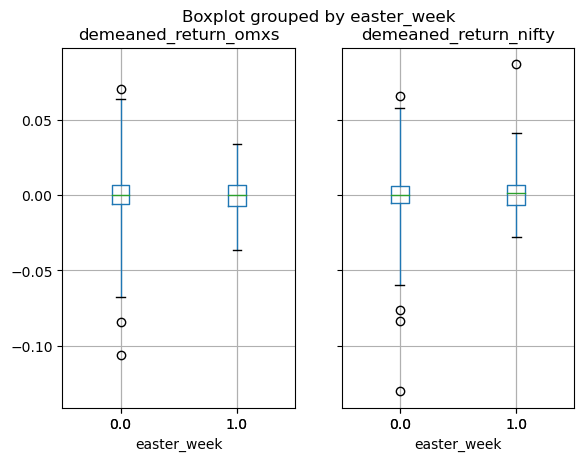

In [80]:
boxplot1 = merge_final.boxplot(column=['demeaned_return_omxs', 'demeaned_return_nifty'],by = 'easter_week', whis=5)



### Illustration: Interactive plot

The interactive plot shows daily returns for a chosen interval of days. Days during easter week as per www.ugenr.dk are marked green.

interactive(children=(Dropdown(description='stock_index', options=('both', 'omxs', 'nifty'), value='both'), Se…

<function dataproject.plot_stock_interactive.<locals>.plot_stock_index(stock_index, start_date=Timestamp('2010-01-05 00:00:00'), end_date=Timestamp('2022-12-30 00:00:00'))>

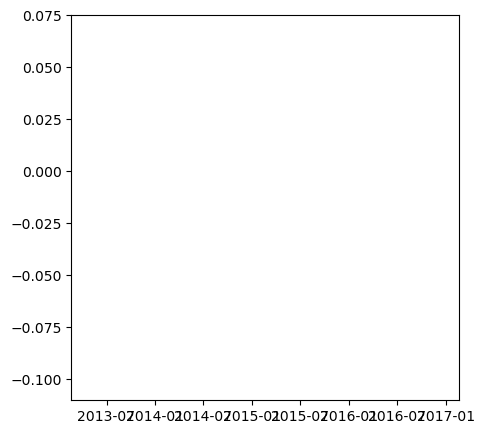

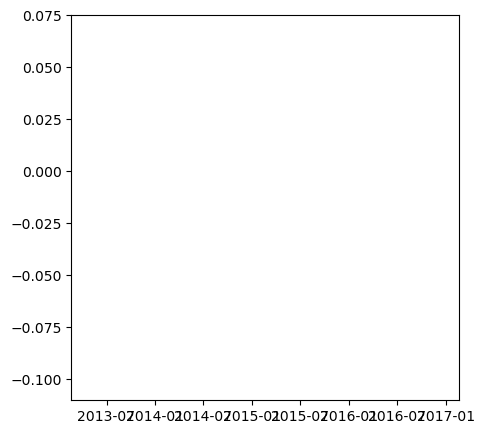

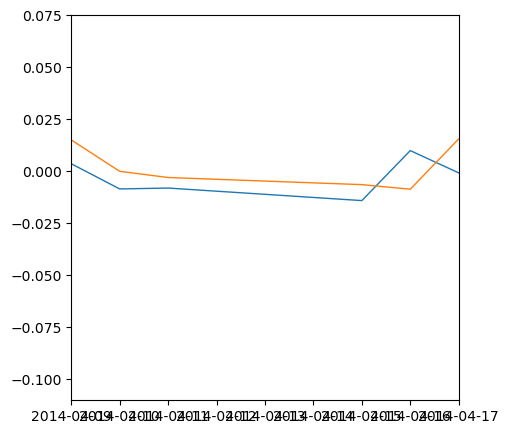

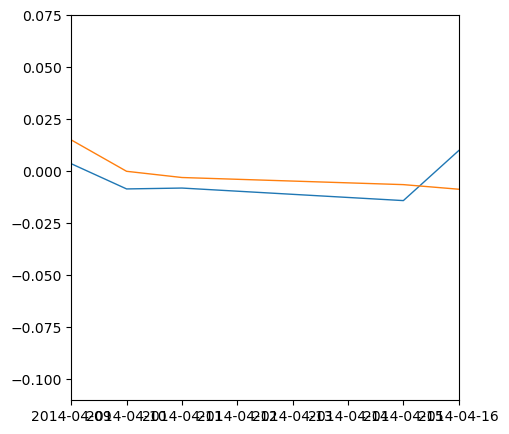

In [ ]:
import dataproject
dataproject.plot_stock_interactive(merge_final)

# Conclusion

We compare returns of the Swedish index OMXS30 and Indian index NIFTY50 in general to returns during easter and find
* mean returns during easter vary very little from general mean returns, 
* mean returns during easter are slightly lower for OMXS30 and slightly higher for NIFTY50
* There is less dispersion during easter, with outliers being more pronounced outside easter (we do realize that this is largely random as - for example - the collapse of the stock market during the Financial crisis or Covid-19 could've happnened during Easter)

